In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WIP/Ecommerce Analysis/ecommerce_sales_analysis.csv')

In [3]:
data.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [5]:
data.shape

(1000, 18)

In [6]:
data.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [7]:
data['category'].value_counts().index.to_list()

['Books',
 'Sports',
 'Toys',
 'Clothing',
 'Health',
 'Electronics',
 'Home & Kitchen']

In [8]:
data.drop(columns=['product_name','product_id'], inplace=True)

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded  = ohe.fit_transform(data[['category']]).toarray()

In [10]:
encoded_df = pd.DataFrame(encoded,columns=data['category'].value_counts().index.to_list())
# Concatenate the original DataFrame and the encoded category DataFrame
df_encoded = pd.concat([data, encoded_df], axis=1).drop(columns=['category'])

In [11]:
df_encoded.head()

,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,...,sales_month_10,sales_month_11,sales_month_12,Books,Sports,Toys,Clothing,Health,Electronics,Home & Kitchen
0,190.40,1.7,220,479,449,92,784,604,904,446,...,252,695,306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,475.60,3.2,903,21,989,861,863,524,128,610,...,294,772,353,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,367.34,4.5,163,348,558,567,143,771,409,290,...,667,267,392,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,301.34,3.9,951,725,678,59,15,937,421,670,...,157,168,203,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,82.23,4.2,220,682,451,649,301,620,293,411,...,548,770,257,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           1000 non-null   float64
 1   review_score    1000 non-null   float64
 2   review_count    1000 non-null   int64  
 3   sales_month_1   1000 non-null   int64  
 4   sales_month_2   1000 non-null   int64  
 5   sales_month_3   1000 non-null   int64  
 6   sales_month_4   1000 non-null   int64  
 7   sales_month_5   1000 non-null   int64  
 8   sales_month_6   1000 non-null   int64  
 9   sales_month_7   1000 non-null   int64  
 10  sales_month_8   1000 non-null   int64  
 11  sales_month_9   1000 non-null   int64  
 12  sales_month_10  1000 non-null   int64  
 13  sales_month_11  1000 non-null   int64  
 14  sales_month_12  1000 non-null   int64  
 15  Books           1000 non-null   float64
 16  Sports          1000 non-null   float64
 17  Toys            1000 non-null   fl

In [13]:
df_encoded.describe()

,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,...,sales_month_10,sales_month_11,sales_month_12,Books,Sports,Toys,Clothing,Health,Electronics,Home & Kitchen
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,...,514.798000,505.83800,500.386000,0.154000,0.140000,0.138000,0.13900,0.125000,0.153000,0.151000
std,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,...,288.710119,288.82451,278.509459,0.361129,0.347161,0.345073,0.34612,0.330884,0.360168,0.358228
min,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.00000,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,...,267.000000,251.25000,259.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,...,532.000000,502.00000,500.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,...,770.250000,761.00000,730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [15]:
df_encoded.dtypes

price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
Books             float64
Sports            float64
Toys              float64
Clothing          float64
Health            float64
Electronics       float64
Home & Kitchen    float64
dtype: object

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
x_train

,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,...,sales_month_10,sales_month_11,sales_month_12,Books,Sports,Toys,Clothing,Health,Electronics,Home & Kitchen
29,4.3,690,487,573,374,180,73,381,9,314,...,919,22,900,1.0,0.0,0.0,0.0,0.0,0.0,0.0
535,1.5,769,271,332,494,100,124,370,380,663,...,598,922,437,0.0,0.0,0.0,1.0,0.0,0.0,0.0
695,1.3,912,402,339,457,493,660,350,28,38,...,997,762,675,0.0,0.0,0.0,0.0,0.0,1.0,0.0
557,2.6,753,389,883,208,160,409,942,991,967,...,948,332,299,0.0,0.0,0.0,0.0,0.0,0.0,1.0
836,1.5,201,784,913,857,63,86,56,12,908,...,383,228,526,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2.6,57,893,984,186,577,143,861,393,503,...,636,887,393,1.0,0.0,0.0,0.0,0.0,0.0,0.0
270,3.8,372,454,771,782,672,966,395,675,510,...,206,344,459,1.0,0.0,0.0,0.0,0.0,0.0,0.0
860,4.1,947,422,259,702,679,555,236,471,903,...,83,132,970,0.0,1.0,0.0,0.0,0.0,0.0,0.0
435,1.1,376,979,757,577,216,693,357,580,747,...,236,249,397,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
y_train

29      27.99
535    472.66
695    307.26
557     19.25
836    457.85
        ...  
106    208.14
270    405.63
860    388.89
435    351.98
102    160.61
Name: price, Length: 800, dtype: float64

In [19]:
model.fit(x_train, y_train)

LinearRegression()

In [20]:
predicted_val = model.predict(x_test)

In [21]:
print(predicted_val)

[289.81346589 238.08471855 207.96915573 208.61289821 226.32812302
 263.63550586 245.19022344 218.19296945 258.46562085 231.49564579
 269.9794026  230.14577309 230.14478044 280.242471   210.9874259
 268.98796253 252.03193737 224.5381975  230.46292104 225.19191157
 246.28476927 304.76618065 280.62249318 286.30801338 260.91771083
 255.69745186 268.49930886 245.11350416 257.5448906  250.85163893
 245.92768829 264.7418844  197.20636794 277.44855968 258.96956682
 258.14706082 232.55879253 288.69755433 249.21532639 250.69135455
 257.80892488 258.54551864 253.57991033 269.62038662 282.95193802
 221.06230404 264.34458611 288.24642735 252.34809117 198.84253845
 224.88136239 248.88994146 275.53471198 247.52868161 294.90492964
 283.81899579 280.01554147 210.16268184 275.01730597 294.70186035
 216.37154272 266.05752388 260.21190275 262.42236569 262.05469197
 273.09864008 259.05157175 210.11911938 209.87341037 250.28438793
 241.32374326 184.4158783  223.23675798 251.94508119 254.89989856
 220.182878

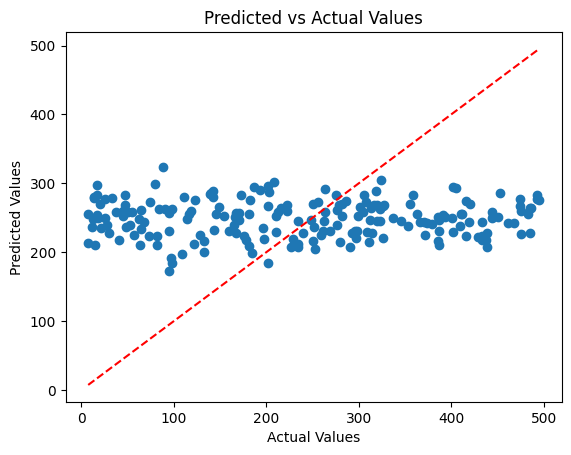

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predicted_val)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


In [23]:
score = r2_score(y_test, predicted_val)
score

-0.03342048354933458

In [24]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [25]:
predicted_val = model2.predict(x_test)
score = r2_score(y_test, predicted_val)
score

-0.0955882360250977